# **Librerías y carga de dataset**

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:

id='1T22LjoDHb0tdt8R1upQ_jpv323xlSJBj'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('cabaventa.csv')


In [ ]:
df_train = pd.read_csv('/content/cabaventa.csv', index_col="id")
df_train.head(3) 

,Unnamed: 0,Unnamed: 0.1,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,43,137,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,...,NaN,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta
2KF4gGpEVoyqnMVFBcF7IA==,44,149,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,...,NaN,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta
BRbo9ohkAnogBN3vgcbh1Q==,45,153,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,...,3.0,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ad_type', 'start_date', 'end_date',
       'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'price_period', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ad_type', 'start_date', 'end_date',
       'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'price_period', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
df_train['ad_type'].value_counts()

Propiedad    183810
Name: ad_type, dtype: int64

# **Consigna 1**

¿Qué información (atributos) hay disponibles para hacer la predicción? Caracterizar cada variable (tipo de atributos -categóricos, numéricos, ordinales-, rangos de valores, etc.

In [ ]:
df_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ad_type', 'start_date', 'end_date',
       'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'currency', 'price_period', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [ ]:
df_train.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Index: 183810 entries, hjHZd/BZqSBy3zb+RrqPYg== to fJLVUIziPl31ACoaE/fj1g==
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       183810 non-null  int64  
 1   Unnamed: 0.1     183810 non-null  int64  
 2   ad_type          183810 non-null  object 
 3   start_date       183810 non-null  object 
 4   end_date         183810 non-null  object 
 5   created_on       183810 non-null  object 
 6   lat              172362 non-null  float64
 7   lon              172362 non-null  float64
 8   l1               183810 non-null  object 
 9   l2               183810 non-null  object 
 10  l3               181963 non-null  object 
 11  l4               7263 non-null    object 
 12  l5               0 non-null       float64
 13  l6               0 non-null       float64
 14  rooms            155680 non-null  float64
 15  bedrooms         133834 non-null  float64
 16  ba

In [ ]:
df_train.shape

(183810, 26)

In [ ]:
df_train.l1.value_counts(dropna = False)

Argentina    183810
Name: l1, dtype: int64

In [ ]:
df_train.l2.value_counts(dropna = False)

Capital Federal    183810
Name: l2, dtype: int64

In [ ]:
df_train.ad_type.value_counts(dropna = False)

Propiedad    183810
Name: ad_type, dtype: int64

In [ ]:
df_train.l4.value_counts(dropna = False)

NaN                  176547
Palermo Hollywood      3178
Palermo Chico          2092
Palermo Soho           1636
Palermo Viejo           357
Name: l4, dtype: int64

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,183810.0,134021.664452,76980.476727,43.000000,67547.250000,134740.500000,200518.750000,2.651240e+05
Unnamed: 0.1,183810.0,503011.040422,291528.040604,137.000000,249768.250000,513589.500000,748791.750000,9.999970e+05
lat,172362.0,-34.590007,0.376025,-53.788624,-34.615663,-34.596872,-34.577306,2.975337e+01
lon,172362.0,-58.462583,0.514948,-100.469651,-58.464658,-58.439264,-58.408084,-5.490771e+00
l5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,155680.0,2.706719,1.520259,1.000000,2.000000,3.000000,4.000000,4.000000e+01
bedrooms,133834.0,1.983696,2.327565,-2.000000,1.000000,2.000000,3.000000,2.860000e+02
bathrooms,158892.0,1.584221,0.963704,1.000000,1.000000,1.000000,2.000000,2.000000e+01
surface_total,122908.0,174.637330,1461.008110,10.000000,45.000000,70.000000,127.000000,1.403800e+05


In [ ]:
df_train.operation_type.value_counts(dropna = False)

Venta    183810
Name: operation_type, dtype: int64

In [ ]:
df_train.price_period.value_counts(dropna=False)

NaN        95090
Mensual    88720
Name: price_period, dtype: int64

In [ ]:
df_train.property_type.value_counts(dropna=False)

Departamento       134044
PH                  13581
Casa                 8743
Lote                 7324
Local comercial      6745
Oficina              5886
Cochera              5188
Otro                 1546
Depósito              745
Casa de campo           8
Name: property_type, dtype: int64

# **Consigna 2 y 3**

¿Hay valores faltantes? En caso de respuesta afirmativa, imputar los valores.
Seleccionar el subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.

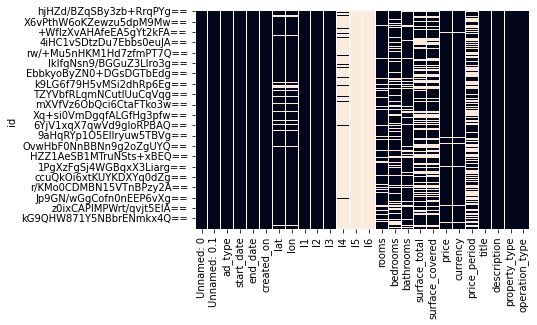

In [ ]:
sns.heatmap(df_train.isna(), cbar=False)

In [ ]:
print(df_train.isna().sum().sort_values(ascending=False))

l6                 183810
l5                 183810
l4                 176547
price_period        95090
surface_covered     62528
surface_total       60902
bedrooms            49976
rooms               28130
bathrooms           24918
lon                 11448
lat                 11448
currency             3674
price                3392
l3                   1847
title                   0
description             0
property_type           0
Unnamed: 0              0
Unnamed: 0.1            0
l2                      0
l1                      0
created_on              0
end_date                0
start_date              0
ad_type                 0
operation_type          0
dtype: int64


In [ ]:
miss_total = pd.DataFrame(df_train.isnull().mean(),columns=['Missings']).sort_values('Missings', ascending =False)
miss_total

,Missings
l6,1.000000
l5,1.000000
l4,0.960486
price_period,0.517328
surface_covered,0.340177
surface_total,0.331331
bedrooms,0.271889
rooms,0.153038
bathrooms,0.135564
lon,0.062282


In [ ]:
df_train[df_train.isnull().sum(axis=1) > 1]

,Unnamed: 0,Unnamed: 0.1,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
hjHZd/BZqSBy3zb+RrqPYg==,43,137,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.638910,-58.476073,Argentina,Capital Federal,...,NaN,372.0,NaN,450000.0,USD,Mensual,Exclente lote !!,"Lote 365 mts 8,90 x 43 mts C3 II.. FOT 3.6 PAR...",Lote,Venta
2KF4gGpEVoyqnMVFBcF7IA==,44,149,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.562124,-58.464449,Argentina,Capital Federal,...,NaN,NaN,NaN,20000.0,USD,Mensual,Excelente cochera fija y cubierta en edificio ...,"Muy buena cochera, en el 4to piso en excelente...",Cochera,Venta
BRbo9ohkAnogBN3vgcbh1Q==,45,153,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.598112,-58.400784,Argentina,Capital Federal,...,3.0,265.0,265.0,600000.0,USD,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Venta
twX40kvJoG1MI6LVXnRKpA==,46,154,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.614123,-58.378985,Argentina,Capital Federal,...,3.0,150.0,150.0,195000.0,USD,Mensual,Importante Oficina en Micro centro de 150 m2.,Importante Oficina de de 150 m2 con palier pr...,Oficina,Venta
+KGGxikZuWylLGEfAS1QQQ==,47,155,Propiedad,2020-08-22,2020-09-04,2020-08-22,-34.603233,-58.385218,Argentina,Capital Federal,...,1.0,NaN,12.0,22000.0,USD,Mensual,Oficina - San Nicolas,VENTA DE OFICINA A METROS DEL PALACIO DE TRIBU...,Oficina,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kW2uYacPEyIcBykz/8rShA==,265117,999940,Propiedad,2020-12-04,2021-01-10,2020-12-04,-34.613926,-58.499472,Argentina,Capital Federal,...,2.0,243.0,180.0,250000.0,USD,NaN,PH 6 Ambientes c/cochera y terraza en Monte Ca...,Corredor Responsable: Rene Vera - CUCICBA 6778...,PH,Venta
29FiS2shjt7d2d87Xz2APA==,265118,999959,Propiedad,2020-12-04,9999-12-31,2020-12-04,-34.570592,-58.462513,Argentina,Capital Federal,...,6.0,641.0,461.0,1650000.0,USD,Mensual,Casa impecable en venta en la mejor zona de -...,Casa en pleno Belgrano R reciclada con excelen...,Casa,Venta
jaNlZUF/XN/I8PWilhABqw==,265119,999977,Propiedad,2020-12-04,2020-12-30,2020-12-04,-34.573074,-58.419353,Argentina,Capital Federal,...,3.0,419.0,375.0,1350000.0,USD,Mensual,Impactante vista a los parques. 420 m2 con coc...,Piso de 419 m2 en un emblemático edificio mode...,Departamento,Venta


## l4, l5 & l6
L6 y L5 se eliminaran teniendo en cuenta que son 100% nulos.

Dado que más del 50% de los datos en el feature l4 son nulos, no deberíamos imputar estos valores, sino eliminar esta columna del dataset de entrenamiento. 

## Feature selection

Se eliminaran las variables de la celda debajo porque las consideramos irrelevantes para nuestro analisis.

In [ ]:
df_train_nulls = df_train.drop(['price_period', 'title', 'operation_type', 'Unnamed: 0', 'Unnamed: 0.1', 'l4', 'l5', 'l6', 'l2', 'l1', 'created_on', 'end_date', 'start_date', 'ad_type', 'operation_type'], axis = 1)
df_train_nulls.shape

(183810, 12)

In [ ]:
df_train_nulls[df_train_nulls.isnull().sum(axis=1) > 5].shape

(1745, 12)

In [ ]:
df_train_nulls.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'description', 'property_type'],
      dtype='object')

Nos quedaremos con las propiedades que solo informan su precio en USD

In [ ]:
df_train_nulls= df_train_nulls.loc[df_train_nulls['currency']=='USD']
df_train_nulls.shape

(179806, 12)

De acuerdo a properati, este feature es un campo no utilizado en Argentina, pero sí en otros países. Como nuestros datos corresponden a Capital Federal, eliminaremos esta columna de nuestro dataset y no imputaremos nulls (https://www.properati.com.ar/data).

In [ ]:
df_train_nulls.drop(['bedrooms', 'currency'], axis=1, inplace=True)

In [ ]:
df_train_nulls.shape

(179806, 10)

Nos enfocaremos en analizar y predecir el precio de las propiedades de tipo Casa, Departamentos y PHs. 

Para esto filtraremos nuestro dataset segun este criterio.


In [ ]:
df_train_nulls.property_type.value_counts()

Departamento       131720
PH                  13469
Casa                 8428
Lote                 6888
Local comercial      6357
Oficina              5669
Cochera              5129
Otro                 1434
Depósito              704
Casa de campo           8
Name: property_type, dtype: int64

In [ ]:
property_study = ['Casa', 'Departamento', 'PH']
df_study =  df_train_nulls.loc[df_train_nulls['property_type'].isin(property_study)]
df_study.shape

(153617, 10)

## price

In [ ]:
df_study['price'].value_counts(dropna = False) 

110000.0    2341
115000.0    2290
120000.0    2256
125000.0    2089
85000.0     2015
            ... 
187800.0       1
708000.0       1
266220.0       1
100382.0       1
586000.0       1
Name: price, Length: 8484, dtype: int64

In [ ]:
df_study['price'].describe().T

count    1.536170e+05
mean     2.410716e+05
std      3.244430e+05
min      0.000000e+00
25%      1.040000e+05
50%      1.550000e+05
75%      2.550000e+05
max      2.140000e+07
Name: price, dtype: float64

In [ ]:
df_study[df_study['price'] == 0] #hay 1 registro que poseen price = 0. Lo eliminamos del dataset

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,description,property_type
id,,,,,,,,,,
GcYAK2C9rCbAh7XXxN4jHQ==,-34.638337,-58.504331,Caballito,1.0,1.0,NaN,NaN,0.0,NO OFERTAR - Impecable departamento sobre la c...,Departamento


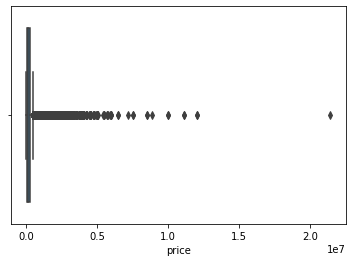

In [ ]:
ax = sns.boxplot(x = df_study['price'])

quantil 668000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


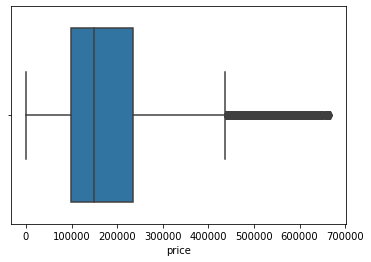

In [ ]:
quantil = df_study['price'].quantile(0.95)
print('quantil ' + str(quantil))
sns.boxplot(df_study['price'][df_study['price'] < quantil])

Nos quedaremos para el analisis de precio con los valores que esten dentro del quantile 0.001 y quantile 0.95.

In [ ]:
q_1 = df_study["price"].quantile(0.001)
q_1

25000.0

In [ ]:
q_95 = df_study["price"].quantile(0.95)
q_95

668000.0

In [ ]:
df_study= df_study.loc[df_study['price']<q_95]
df_study.shape

(145935, 10)

In [ ]:
df_study= df_study.loc[df_study['price']>q_1]
df_study.shape

(145780, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


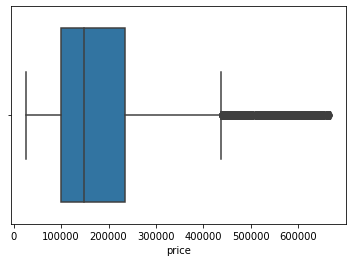

In [ ]:
sns.boxplot(df_study['price'])

In [ ]:
df_study['price'].describe().T

count    145780.000000
mean     186750.525525
std      121168.015232
min       25750.000000
25%      100000.000000
50%      149000.000000
75%      235000.000000
max      667500.000000
Name: price, dtype: float64

In [ ]:
df_study.to_csv('df_study_pre_procesamiento.csv')

## Crearemos variables shadows
 Estan tomaran valor 1 cuando tome nulo la variable original y 0 cuando no.

In [ ]:
vars_na = [var for var in df_study.columns if df_study[var].isnull().sum() > 0]
for var in vars_na:
    df_study[var +"_NAN"] = np.where(df_study[var].isnull(),1,0)

## l3

In [ ]:
df_study['l3'].value_counts(dropna = False)

Palermo                 19940
Belgrano                16514
Caballito                9935
Recoleta                 8164
Villa Urquiza            7304
Almagro                  7152
Villa Crespo             6608
Flores                   4424
Nuñez                    4321
Barrio Norte             4275
Balvanera                3738
Colegiales               3300
San Cristobal            3039
Villa Devoto             2722
Saavedra                 2710
Villa del Parque         2346
San Telmo                2318
Boedo                    2114
Floresta                 2055
Barracas                 1784
Mataderos                1777
Liniers                  1768
Parque Chacabuco         1549
San Nicolás              1516
Villa Luro               1500
Coghlan                  1491
Villa Pueyrredón         1490
Retiro                   1465
Monserrat                1410
Puerto Madero            1343
Villa Lugano             1074
Congreso                 1068
Chacarita                 999
NaN       

In [ ]:
df_study[(df_study['lon'].isna() == True ) & (df_study['lat'].isna() == True)]['l3'].to_frame().value_counts(dropna = False)

l3                  
Palermo                 1661
Belgrano                 975
Recoleta                 549
NaN                      542
Barrio Norte             463
Almagro                  462
Caballito                401
San Cristobal            324
Nuñez                    302
San Telmo                243
Flores                   230
Balvanera                205
Villa Crespo             198
Villa Urquiza            190
Puerto Madero            148
Mataderos                134
Constitución             129
Abasto                   114
Liniers                   87
Congreso                  84
Monserrat                 82
Tribunales                67
Las Cañitas               64
Villa del Parque          64
Retiro                    60
San Nicolás               56
Coghlan                   52
Villa Luro                49
Floresta                  40
Saavedra                  33
Once                      29
Colegiales                27
Villa Devoto              26
Parque Chacabuco      

In [ ]:
df_study.shape

(145780, 17)

In [ ]:
df1= df_study.loc[((df_study['lat'].isna() == False) & (df_study['lon'].isna() == False)) & (df_study['l3'].isna() == False)]
df1.shape

(137059, 17)

## bathrooms

In [ ]:
df_study['bathrooms'].value_counts(dropna = False) 

1.0     92115
2.0     34890
3.0      8775
NaN      7107
4.0      2326
5.0       361
6.0       103
7.0        64
8.0        21
9.0        11
10.0        5
12.0        2
Name: bathrooms, dtype: int64

## surface_total

In [ ]:
df_study['surface_total'].value_counts(dropna = False)

NaN        48186
40.0        2076
50.0        2029
42.0        1857
45.0        1799
           ...  
5741.0         1
8988.0         1
1208.0         1
62100.0        1
3562.0         1
Name: surface_total, Length: 761, dtype: int64

## surface_covered

In [ ]:
df_study['surface_covered'].value_counts(dropna = False)

NaN       46563
40.0       2793
35.0       2325
42.0       2251
50.0       2187
          ...  
8695.0        1
4868.0        1
11.0          1
359.0         1
468.0         1
Name: surface_covered, Length: 557, dtype: int64

## Imputación rooms, bathrooms, surface_total and surface_covered

Imputaremos los valores faltantes de cada una de estas variables por la mediana de cada tipo de propiedad.

In [ ]:
df_study['rooms'].value_counts(dropna = False) #NaN = 8357

2.0     40756
3.0     38458
1.0     27453
4.0     22360
NaN      8357
5.0      5785
6.0      1495
7.0       601
8.0       262
10.0       85
9.0        77
11.0       25
12.0       22
14.0       13
15.0        8
18.0        4
16.0        3
20.0        3
13.0        3
21.0        3
30.0        2
19.0        2
35.0        1
24.0        1
22.0        1
Name: rooms, dtype: int64

In [ ]:
medianas_propiedad = df_study.groupby(by=['property_type']).median().round()
medianas_propiedad = medianas_propiedad[['rooms', 'bathrooms', 'surface_total',	'surface_covered']]
medianas_propiedad

,rooms,bathrooms,surface_total,surface_covered
property_type,,,,
Casa,4.0,2.0,208.0,156.0
Departamento,2.0,1.0,58.0,52.0
PH,3.0,1.0,100.0,75.0


In [ ]:
def imputar_medianas(df, medianas_propiedad):
  df_train_copy = df.copy()
  for index, row in df_train_copy.iterrows():
    if (pd.isnull(df_train_copy['rooms'][index]) == True):
      property_type = df_train_copy['property_type'][index] 
      rooms = medianas_propiedad[medianas_propiedad.index == property_type]['rooms']
      df_train_copy['rooms'][index] = rooms
    if (pd.isnull(df_train_copy['bathrooms'][index]) == True):
      property_type = df_train_copy['property_type'][index] 
      bathrooms = medianas_propiedad[medianas_propiedad.index == property_type]['bathrooms']
      df_train_copy['bathrooms'][index] = bathrooms
    if (pd.isnull(df_train_copy['surface_total'][index]) == True):
      property_type = df_train_copy['property_type'][index] 
      surface_total = medianas_propiedad[medianas_propiedad.index == property_type]['surface_total']
      df_train_copy['surface_total'][index] = surface_total
    if (pd.isnull(df_train_copy['surface_covered'][index]) == True):
      property_type = df_train_copy['property_type'][index] 
      surface_covered = medianas_propiedad[medianas_propiedad.index == property_type]['surface_covered']
      df_train_copy['surface_covered'][index] = surface_covered

  return df_train_copy

df_train_2 = df_study
df_train_2 = imputar_medianas(df_train_2, medianas_propiedad)
df_train_2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/

,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,description,property_type,lat_NAN,lon_NAN,l3_NAN,rooms_NAN,bathrooms_NAN,surface_total_NAN,surface_covered_NAN
id,,,,,,,,,,,,,,,,,
U3qdJMKXnOJm0Y1tWpnnfg==,-34.597364,-58.372987,Retiro,2.0,1.0,58.0,25.0,85000.0,"EXCELENTE DEPTO MUY LUMINOSO, <br><br>LAS MEDI...",Departamento,0,0,0,1,1,1,0
gsQB/JzLxaQdBLfNcm/DMw==,-34.600004,-58.417191,Almagro,1.0,1.0,38.0,31.0,110000.0,Monoambiente de 38m² en muy buen estado con Am...,Departamento,0,0,0,0,0,0,0
SlPt6GJRjM+cO4rD3n3HFQ==,-34.581699,-58.433547,Palermo,1.0,1.0,35.0,30.0,105000.0,RETASADO Venta Palermo Niceto Vega y Bonpland ...,Departamento,0,0,0,0,0,0,0
ZaH+6DXJ4MLM6QqZXhgWiw==,-34.595044,-58.442538,Palermo,2.0,1.0,51.0,46.0,150000.0,CONTACTO: 11- (LLAMADOS O WHATSAPP)<br><br>EXC...,Departamento,0,0,0,0,0,0,0
r7qrM5xaYo8QImSnqyKyYA==,-34.582549,-58.417350,Palermo,2.0,1.0,53.0,53.0,136500.0,2 AMBIENTES CON 2 BALCÓNES PISO 8<br><br>Inmej...,Departamento,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iLCO/FJyUIS7qWUZumhJ3Q==,-34.550627,-58.453145,Congreso,6.0,1.0,95.0,95.0,109000.0,OPORTUNIDAD PARA RECICLAR!!! Piso en Congreso ...,Departamento,0,0,0,0,0,0,0
uW8iDzRUJQWYWwk3MQQRyw==,NaN,NaN,Recoleta,5.0,3.0,190.0,180.0,510000.0,"Lindisimo Piso en Recoleta , Hall de entrada ,...",Departamento,1,1,0,0,0,0,0
fnn4k7xCc/xMRH6N56OnNA==,-34.614237,-58.394551,Balvanera,5.0,1.0,58.0,52.0,235000.0,<b>Impecable departamento tipo Ph con patio.</...,Departamento,0,0,0,0,1,1,1


In [ ]:
df_train_2.shape

(145780, 17)

In [ ]:
df_train_2.rooms.value_counts(dropna =False)

2.0     46712
3.0     39363
1.0     27453
4.0     23856
5.0      5785
6.0      1495
7.0       601
8.0       262
10.0       85
9.0        77
11.0       25
12.0       22
14.0       13
15.0        8
18.0        4
21.0        3
16.0        3
20.0        3
13.0        3
30.0        2
19.0        2
35.0        1
24.0        1
22.0        1
Name: rooms, dtype: int64

In [ ]:
df_train_2.rooms.value_counts(dropna =False)

2.0     46712
3.0     39363
1.0     27453
4.0     23856
5.0      5785
6.0      1495
7.0       601
8.0       262
10.0       85
9.0        77
11.0       25
12.0       22
14.0       13
15.0        8
18.0        4
21.0        3
16.0        3
20.0        3
13.0        3
30.0        2
19.0        2
35.0        1
24.0        1
22.0        1
Name: rooms, dtype: int64

In [ ]:
df_train_2.rooms.isnull().sum()

0

## Análisis adicional

In [ ]:
df_study.shape

(145780, 17)

In [ ]:
df_study.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'description', 'property_type', 'lat_NAN',
       'lon_NAN', 'l3_NAN', 'rooms_NAN', 'bathrooms_NAN', 'surface_total_NAN',
       'surface_covered_NAN'],
      dtype='object')

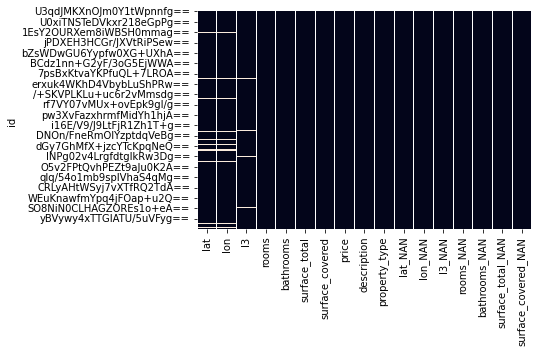

In [ ]:
sns.heatmap(df_train_2.isna(), cbar=False)

In [ ]:
df_train_2.isnull().sum().sum()

17567

In [ ]:
df_train_2['l3'].value_counts(dropna = False)

Palermo                 19940
Belgrano                16514
Caballito                9935
Recoleta                 8164
Villa Urquiza            7304
Almagro                  7152
Villa Crespo             6608
Flores                   4424
Nuñez                    4321
Barrio Norte             4275
Balvanera                3738
Colegiales               3300
San Cristobal            3039
Villa Devoto             2722
Saavedra                 2710
Villa del Parque         2346
San Telmo                2318
Boedo                    2114
Floresta                 2055
Barracas                 1784
Mataderos                1777
Liniers                  1768
Parque Chacabuco         1549
San Nicolás              1516
Villa Luro               1500
Coghlan                  1491
Villa Pueyrredón         1490
Retiro                   1465
Monserrat                1410
Puerto Madero            1343
Villa Lugano             1074
Congreso                 1068
Chacarita                 999
NaN       

In [ ]:
df_train_2.to_csv('df_train_modif.csv')

In [ ]:
df_train_2.shape

(145780, 17)

In [ ]:
df_new_features = df_train_2

## Feature engineering

In [ ]:
# Creación de la columna comuna
comuna1 = ["Retiro", "San Nicolás", "San Telmo", "Tribunales", "Monserrat", "Constitución", "Centro / Microcentro"]
comuna2 = ["Recoleta", "Puerto Madero", "Catalinas", "Barrio Norte"]
comuna3 = ["Balvanera", "San Cristobal", "Congreso"]
comuna4 = ["Boca", "Pompeya", "Nueva Pompeya", "Parque Patricios", "Barracas"]
comuna5 = ["Almagro", "Boedo", "Abasto", "Parque Centenario", "Once"]
comuna6 = ["Caballito"]
comuna7 = ["Flores", "Parque Chacabuco"]
comuna8 = ["Villa Soldati", "Villa Riachuelo", "Villa Lugano"]
comuna9 = ["Parque Avellaneda", "Liniers", "Mataderos"]
comuna10 = ["Villa Real", "Monte Castro", "Versalles", "Floresta", "Velez Sarsfield", "Vélez Sarsfield", "Villa Luro", "Villa Real"]
comuna11 = ["Villa General Mitre", "Villa Devoto", "Villa del Parque", "Villa Santa Rita"]
comuna12 = ["Villa Urquiza", "Villa Pueyrredón", "Villa Pueyrredon", "Saavedra", "Coghlan"]
comuna13 = ["Nuñez", "Belgrano", "Colegiales"]
comuna14 = ["Las Cañitas", "Palermo", 'GBA Norte']
comuna15 = ["Chacarita", "Villa Crespo", "Paternal", "Agronomía", "Parque Chas", "Villa Ortuzar"]



In [ ]:
df_new_features = df_new_features[df_new_features['l3'].isna() == False]

In [ ]:
df_new_features["comunas"] = np.where(df_new_features["l3"].isin(comuna1), "comuna1",
                 np.where(df_new_features["l3"].isin(comuna2), "comuna2",
                 np.where(df_new_features["l3"].isin(comuna3), "comuna3",
                 np.where(df_new_features["l3"].isin(comuna4), "comuna4",
                 np.where(df_new_features["l3"].isin(comuna5), "comuna5",
                 np.where(df_new_features["l3"].isin(comuna6), "comuna6",
                 np.where(df_new_features["l3"].isin(comuna7), "comuna7",
                 np.where(df_new_features["l3"].isin(comuna8), "comuna8",
                 np.where(df_new_features["l3"].isin(comuna9), "comuna9",
                 np.where(df_new_features["l3"].isin(comuna10), "comuna10",
                 np.where(df_new_features["l3"].isin(comuna11), "comuna11",
                 np.where(df_new_features["l3"].isin(comuna12), "comuna12",
                 np.where(df_new_features["l3"].isin(comuna13), "comuna13",
                 np.where(df_new_features["l3"].isin(comuna14), "comuna14",
                 np.where(df_new_features["l3"].isin(comuna15), "comuna15","otro")))))))))))))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
df_new_features['comunas'].value_counts()

comuna13    24135
comuna14    20477
comuna2     13788
comuna12    12995
comuna5     10852
comuna15     9994
comuna6      9935
comuna1      8268
comuna3      7845
comuna11     6311
comuna7      5973
comuna10     5275
comuna9      4064
comuna4      3692
comuna8      1217
Name: comunas, dtype: int64

In [ ]:
df_new_features[df_new_features['comunas'] == 'otro']['l3'].value_counts(dropna=False)

Series([], Name: l3, dtype: int64)

In [ ]:
df_new_features = pd.get_dummies(data=df_new_features,columns=['comunas'])
df_new_features.shape

(144821, 32)

In [ ]:
df_new_features = pd.get_dummies(data=df_new_features,columns=['property_type'])

In [ ]:
import re

balcon_pattern = 'balcon|balcón|valcon|blcon'
balcon_regex =re.compile(balcon_pattern, re.IGNORECASE)
df_new_features['balcon_descrip'] = df_new_features['description'].apply(lambda x: x if x is np.NaN else balcon_regex.search(x))
df_new_features.loc[df_new_features['balcon_descrip'].notnull(),('balcon_descrip')]=1
df_new_features['balcon_descrip'].fillna(0, inplace = True)

pileta_pattern = 'pileta|pile|pilta'
pileta_regex =re.compile(pileta_pattern, re.IGNORECASE)
df_new_features['pileta_descrip'] = df_new_features['description'].apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
df_new_features.loc[df_new_features['pileta_descrip'].notnull(),('pileta_descrip')]=1
df_new_features['pileta_descrip'].fillna(0, inplace = True)

amennities_pattern = 'amenities|amennities|amnts|amenitis|amennitis|amntis'
amennities_regex =re.compile(amennities_pattern, re.IGNORECASE)
df_new_features['amenities_descrip'] = df_new_features['description'].apply(lambda x: x if x is np.NaN else amennities_regex.search(x))
df_new_features.loc[df_new_features['amenities_descrip'].notnull(),('amenities_descrip')]=1
df_new_features['amenities_descrip'].fillna(0, inplace = True)

cochera_pattern = 'garage|cochera|coche|garaje'
cochera_regex =re.compile(cochera_pattern, re.IGNORECASE)
df_new_features['cochera_descrip'] = df_new_features['description'].apply(lambda x: x if x is np.NaN else cochera_regex.search(x))
df_new_features.loc[df_new_features['cochera_descrip'].notnull(),('cochera_descrip')]=1
df_new_features['cochera_descrip'].fillna(0, inplace = True)

parrilla_pattern = 'parrilla|parri|parrila|parilla|parrillas|parrilas|parillas'
parrillas_regex =re.compile(parrilla_pattern, re.IGNORECASE)
df_new_features['parrilla_descrip'] = df_new_features['description'].apply(lambda x: x if x is np.NaN else parrillas_regex.search(x))
df_new_features.loc[df_new_features['parrilla_descrip'].notnull(),('parrilla_descrip')]=1
df_new_features['parrilla_descrip'].fillna(0, inplace = True)

In [ ]:
df_new_features.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'description', 'lat_NAN', 'lon_NAN',
       'l3_NAN', 'rooms_NAN', 'bathrooms_NAN', 'surface_total_NAN',
       'surface_covered_NAN', 'comunas_comuna1', 'comunas_comuna10',
       'comunas_comuna11', 'comunas_comuna12', 'comunas_comuna13',
       'comunas_comuna14', 'comunas_comuna15', 'comunas_comuna2',
       'comunas_comuna3', 'comunas_comuna4', 'comunas_comuna5',
       'comunas_comuna6', 'comunas_comuna7', 'comunas_comuna8',
       'comunas_comuna9', 'property_type_Casa', 'property_type_Departamento',
       'property_type_PH', 'balcon_descrip', 'pileta_descrip',
       'amenities_descrip', 'cochera_descrip', 'parrilla_descrip'],
      dtype='object')

In [ ]:
df_new_features.shape

(144821, 39)

In [ ]:
df_model = df_new_features.drop(['lat', 'lon','l3', 'description', 'lat_NAN', 'lon_NAN', 'l3_NAN'], axis = 1)

In [ ]:
df_model.shape

(144821, 32)

Recategorización de data types

In [ ]:
import math
def redondear_float(n, decimals=0):
  if math.isnan(n) == False: 
    multiplier = 10 ** decimals
    n_redondeado = int(math.floor(n*multiplier + 0.5) / multiplier)
    return n_redondeado

In [ ]:
df_model['price'] = df_model['price'].apply(lambda x: redondear_float(x))
df_model['rooms'] = df_model['rooms'].apply(lambda x: redondear_float(x))
df_model['bathrooms'] = df_model['bathrooms'].apply(lambda x: redondear_float(x))
df_model['surface_total'] = df_model['surface_total'].apply(lambda x: redondear_float(x))
df_model['surface_covered'] = df_model['surface_covered'].apply(lambda x: redondear_float(x))

In [ ]:
df_model = df_model.astype({'price': 'int64',  \
                            'bathrooms': 'int64',   \
                            'rooms': 'int64',  \
                            'surface_total': 'int64',  \
                            'surface_covered': 'int64' })
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144821 entries, U3qdJMKXnOJm0Y1tWpnnfg== to kW2uYacPEyIcBykz/8rShA==
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   rooms                       144821 non-null  int64
 1   bathrooms                   144821 non-null  int64
 2   surface_total               144821 non-null  int64
 3   surface_covered             144821 non-null  int64
 4   price                       144821 non-null  int64
 5   rooms_NAN                   144821 non-null  int64
 6   bathrooms_NAN               144821 non-null  int64
 7   surface_total_NAN           144821 non-null  int64
 8   surface_covered_NAN         144821 non-null  int64
 9   comunas_comuna1             144821 non-null  uint8
 10  comunas_comuna10            144821 non-null  uint8
 11  comunas_comuna11            144821 non-null  uint8
 12  comunas_comuna12            144821 non-null  uint8
 13  comunas_

# **Consigna 4**

Clasifique la variable respuesta en BAJO, MEDIO y ALTO

In [ ]:
df_model['price'].describe()

count    144821.000000
mean     186855.412413
std      121112.378756
min       25750.000000
25%      100000.000000
50%      149000.000000
75%      235000.000000
max      667500.000000
Name: price, dtype: float64

In [ ]:
df_model['price'].median()

149000.0

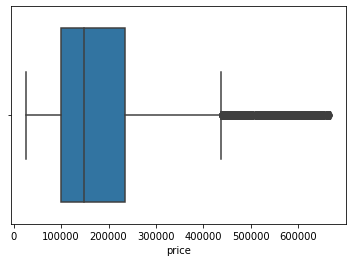

In [ ]:
ax = sns.boxplot(x = df_model['price'])

In [ ]:
#1: bajo, 2: medio, 3:alto

def discretize_precio_categoria(x):
  ##Categorizo precios
  price_conditions = [
      (x['price'] < 100000),
      (x['price'] >= 100000) & (x['price'] < 235000),
      (x['price'] >= 235000)
  ]
  values_price_cat = [1, 2, 3]
  x['precio_categoria'] = np.select(price_conditions, values_price_cat)
  return x

In [ ]:
df_model.shape

(144821, 32)

In [ ]:
discretize_precio_categoria(df_model)
df_model.shape

(144821, 33)

In [ ]:
df_model['precio_categoria'].value_counts() / len(df_model) * 100

2    49.950629
3    25.193860
1    24.855511
Name: precio_categoria, dtype: float64

In [ ]:
df_model.to_csv('df_model.csv')

# **Consigna 5**

Realizar una separación de datos en conjuntos de desarrollo y de evaluación.
Entrenar un árbol de decisión en los datos de desarrollo con los hiperparámetros por defecto de sklearn pero con profundidad máxima 4 para clasificar el rango de precio.
Evaluar el árbol entrenado y reportar las métricas de clasificación que crean relevantes tanto en el conjunto de desarrollo como el de evaluación. Justifique las métricas seleccionadas.

In [ ]:
df_model.info()

In [ ]:
df_train_mod = df_model.drop(['price'], axis = 1)

In [ ]:
df_train_mod.info()

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

columnas = df_train_mod.columns.to_list()
columnas.remove('precio_categoria')

X_train, X_test, y_train, y_test = train_test_split(df_train_mod[columnas], df_train_mod['precio_categoria'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

arbol_sklearn = tree.DecisionTreeClassifier(max_depth=4)
arbol_sklearn.fit(X_train,y_train)
y_pred_test = arbol_sklearn.predict(X_test)
y_pred_train = arbol_sklearn.predict(X_train)

print('Accuracy score- Train acc: {}'.format(accuracy_score(y_train,y_pred_train)))
print('Accuracy score- Test acc: {}'.format(accuracy_score(y_test,y_pred_test)))

print('Precision score - Train acc: {}'.format(precision_score(y_train, y_pred_train, average='macro')))
print('Precision score - Test acc: {}'.format(precision_score(y_test, y_pred_test, average='macro')))

print('Recall score - Train acc: {}'.format(recall_score(y_train, y_pred_train, average='macro')))
print('Recall score - Test acc: {}'.format(recall_score(y_test, y_pred_test, average='macro')))

print('F1 score - Train acc: {}'.format(f1_score(y_train, y_pred_train, average='macro')))
print('F1 score - Test acc: {}'.format(f1_score(y_test, y_pred_test, average='macro')))


/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Accuracy score- Train acc: 0.7011561149801724
Accuracy score- Test acc: 0.6989435404055516
Precision score - Train acc: 0.6997588760400791
Precision score - Test acc: 0.6990132487013914
Recall score - Train acc: 0.6971314494108672
Recall score - Test acc: 0.6936373716956058
F1 score - Train acc: 0.6963319494813028
F1 score - Test acc: 0.6940451377991792


              precision    recall  f1-score   support

           1       0.70      0.59      0.64     10806
           2       0.70      0.71      0.71     21678
           3       0.70      0.78      0.74     10963

   micro avg       0.70      0.70      0.70     43447
   macro avg       0.70      0.69      0.69     43447
weighted avg       0.70      0.70      0.70     43447



Text(33.0, 0.5, 'True')

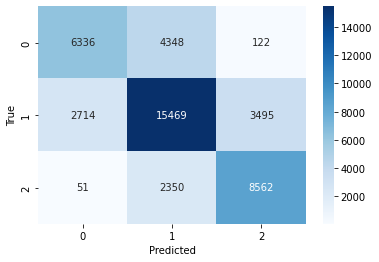

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_test))

cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# **Consigna 6**

Graficar el árbol de decisión resultante.

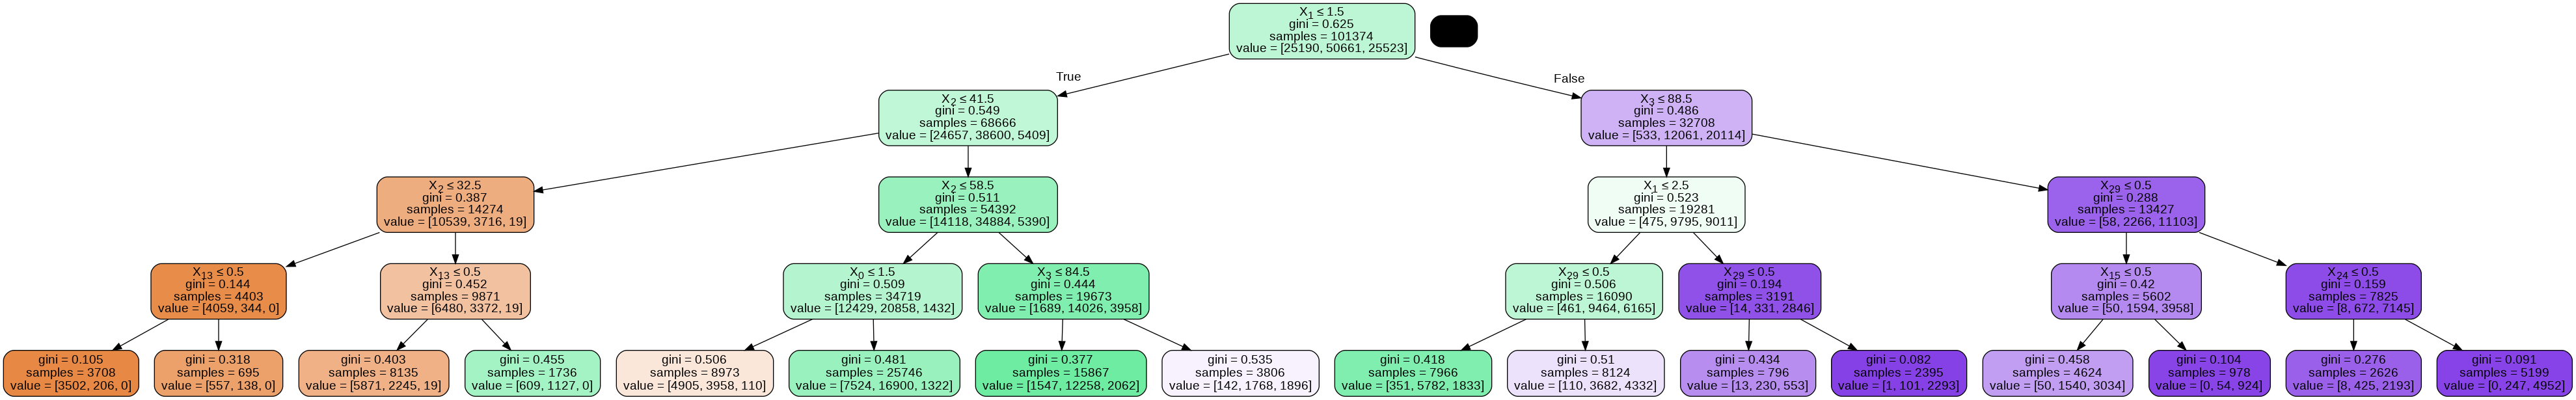

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

dot_data = StringIO()
export_graphviz(arbol_sklearn, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# **Consigna 7**

¿Cuál variable considera que fue más importante para el árbol de decisión?
Responder esta pregunta a partir del gráfico del punto 6 y mediante el  cálculo de importancia de atributos.

In [ ]:
importancia = pd.DataFrame({'predictor':X_train.columns,
                            'importancia': arbol_sklearn.feature_importances_})

Consideramos que la variable mas importante es bathrooms, como podemos ver en el árbol, es aquella que se encuentra en la raiz (X1) se optimiza la variable por el indicie de gini cuando su particion toma el valor 1.5

In [ ]:
importancia.sort_values('importancia', ascending = False)

,predictor,importancia
1,bathrooms,0.498215
2,surface_total,0.276799
3,surface_covered,0.119032
29,cochera_descrip,0.045638
0,rooms,0.033579
13,comunas_comuna14,0.018824
15,comunas_comuna2,0.005811
24,property_type_Departamento,0.002100
7,surface_covered_NAN,0.000000
8,comunas_comuna1,0.000000


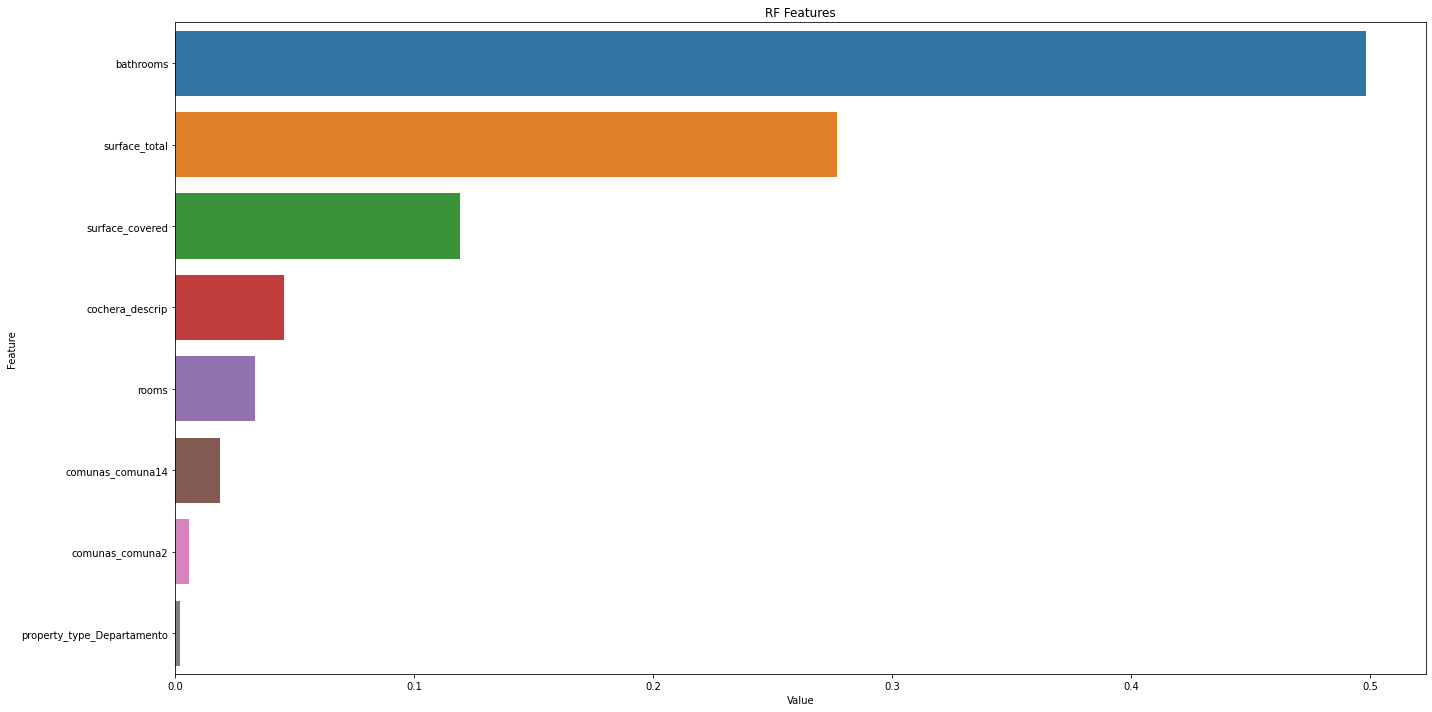

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(arbol_sklearn.feature_importances_,X_test.columns)), columns=['Value', 'Feature'])

plt.figure(figsize=(20,10))
sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by="Value", ascending = False).head(8))
plt.title('RF Features')
plt.tight_layout()
plt.show()

# **Consigna 8**

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf). Para ello, usar random search y 5-fold cross-validation sobre el conjunto de desarrollo para
explorar muchas combinaciones posibles de valores. Elija la métrica a optimizar. Justifique.

Para buscar la optimización de los hiperparámetros principales del DecisionTreeClassifier, ejecutamos RandomizedSearchCV para utilizar:
Criterios: Tanto gini como entropía
max_depth: Valores entre 1 y 30
min_samples_leaf: Valores desde 10 a 100, en rangos de 10

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import numpy as np

n_seeds = 10
accs = []
precisions = []
recalls = []
f1s = []

x_train, x_test, y_train, y_test = train_test_split(df_train_mod[columnas], df_train_mod['precio_categoria'], test_size=0.3, random_state=42)

params_grid = {'criterion':['gini','entropy'],
               'max_depth':list(range(1,30)),
               'min_samples_leaf':list(range(10,101,10))}

kfoldcv = StratifiedKFold(n_splits=4)
base_tree = tree.DecisionTreeClassifier()
scorer_fn = make_scorer(accuracy_score)
randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=10,)
randomcv.fit(x_train,y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

In [ ]:
pd.DataFrame(randomcv.cv_results_).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.204839,0.003988,0.010765,0.000148,30,7,entropy,"{'min_samples_leaf': 30, 'max_depth': 7, 'crit...",0.745512,0.742819,...,0.736445,0.741206,0.003360,9,0.745255,0.742628,0.744104,0.740741,0.743182,0.001689
1,0.241088,0.006791,0.011919,0.000798,60,9,entropy,"{'min_samples_leaf': 60, 'max_depth': 9, 'crit...",0.755376,0.756984,...,0.754952,0.754967,0.001585,8,0.758092,0.759016,0.758506,0.760364,0.758995,0.000856
2,0.265979,0.006660,0.011737,0.000122,60,11,entropy,"{'min_samples_leaf': 60, 'max_depth': 11, 'cri...",0.771316,0.772096,...,0.769158,0.770040,0.001778,5,0.775152,0.776720,0.776552,0.777475,0.776475,0.000839
3,0.261747,0.002175,0.011673,0.000085,50,11,gini,"{'min_samples_leaf': 50, 'max_depth': 11, 'cri...",0.779246,0.779711,...,0.776182,0.778464,0.001364,3,0.785095,0.785650,0.787508,0.786024,0.786069,0.000894
4,0.061367,0.002330,0.009485,0.000465,20,1,gini,"{'min_samples_leaf': 20, 'max_depth': 1, 'crit...",0.578063,0.579624,...,0.579907,0.579182,0.000703,10,0.579555,0.579035,0.579198,0.578940,0.579182,0.000234
5,0.285879,0.006593,0.012346,0.000351,90,27,entropy,"{'min_samples_leaf': 90, 'max_depth': 27, 'cri...",0.781850,0.779119,...,0.778352,0.778967,0.001909,2,0.786345,0.786269,0.785719,0.785196,0.785882,0.000464
6,0.274098,0.001811,0.011979,0.000090,100,15,gini,"{'min_samples_leaf': 100, 'max_depth': 15, 'cr...",0.778773,0.778330,...,0.778865,0.778010,0.001137,4,0.780965,0.783257,0.782418,0.781539,0.782045,0.000870
7,0.236279,0.003232,0.012504,0.000830,30,9,gini,"{'min_samples_leaf': 30, 'max_depth': 9, 'crit...",0.758927,0.755563,...,0.761503,0.759159,0.002274,6,0.763735,0.763172,0.768542,0.771886,0.766834,0.003586
8,0.250112,0.002322,0.011946,0.000786,60,10,entropy,"{'min_samples_leaf': 60, 'max_depth': 10, 'cri...",0.757704,0.757576,...,0.760398,0.757818,0.001708,7,0.763222,0.765251,0.764083,0.763507,0.764016,0.000777
9,0.330163,0.005244,0.013292,0.000213,20,22,gini,"{'min_samples_leaf': 20, 'max_depth': 22, 'cri...",0.795265,0.795060,...,0.794531,0.794356,0.001067,1,0.815531,0.815717,0.815378,0.816419,0.815761,0.000398


In [ ]:
randomcv.best_params_

{'criterion': 'gini', 'max_depth': 22, 'min_samples_leaf': 20}

In [ ]:
best_tree = randomcv.best_estimator_

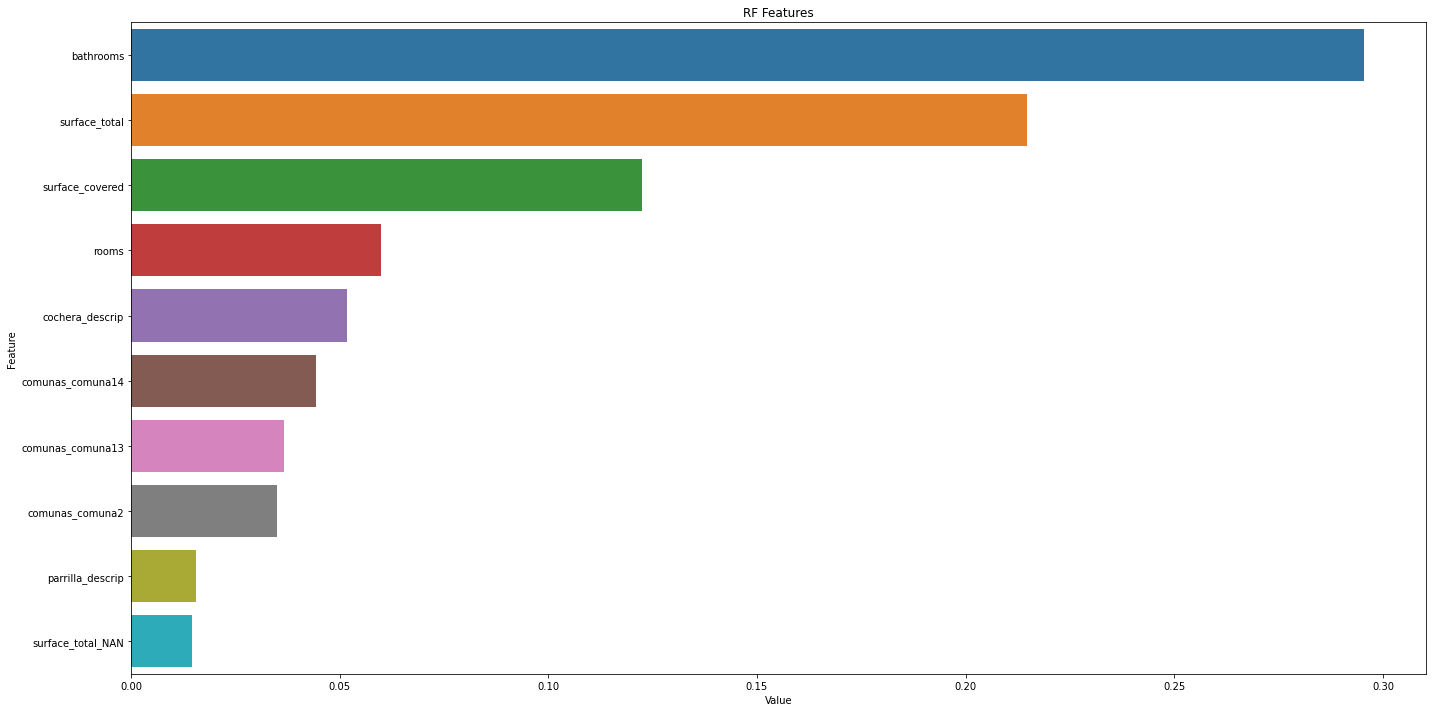

In [ ]:
feature_imp_best = pd.DataFrame(sorted(zip(randomcv.best_estimator_.feature_importances_,X_test.columns)), columns=['Value', 'Feature'])

plt.figure(figsize=(20,10))
sns.barplot(x='Value', y='Feature', data=feature_imp_best.sort_values(by="Value", ascending = False).head(10))
plt.title('RF Features')
plt.tight_layout()
plt.show()

# **Consigna 9**

Para la mejor configuración encontrada, reportar métricas de clasificación y matriz de confusión. Compararlos con los valores obtenidos en 5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = randomcv.best_estimator_
y_pred = best_model.predict(x_test)
y_train_pred = best_model.predict(x_train)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.73      0.76     10806
           2       0.78      0.84      0.81     21678
           3       0.85      0.80      0.82     10963

   micro avg       0.80      0.80      0.80     43447
   macro avg       0.81      0.79      0.80     43447
weighted avg       0.80      0.80      0.80     43447



Text(33.0, 0.5, 'True')

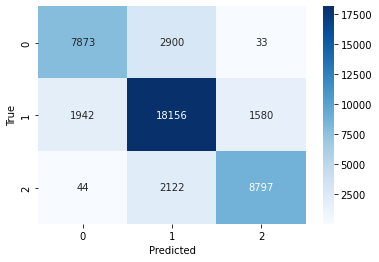

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:

print(classification_report(y_test,y_pred))

print('Accuracy score- Train acc: {}'.format(accuracy_score(y_train,y_train_pred)))
print('Accuracy score- Test acc: {}'.format(accuracy_score(y_test,y_pred)))

print('Precision score - Train acc: {}'.format(precision_score(y_train,y_train_pred, average='macro')))
print('Precision score - Test acc: {}'.format(precision_score(y_test,y_pred, average='macro')))

print('Recall score - Train acc: {}'.format(recall_score(y_train,y_train_pred, average='macro')))
print('Recall score - Test acc: {}'.format(recall_score(y_test,y_pred, average='macro')))

print('F1 score - Train acc: {}'.format(f1_score(y_train,y_train_pred, average='macro')))
print('F1 score - Test acc: {}'.format(f1_score(y_test,y_pred, average='macro')))

              precision    recall  f1-score   support

           1       0.80      0.73      0.76     10806
           2       0.78      0.84      0.81     21678
           3       0.85      0.80      0.82     10963

   micro avg       0.80      0.80      0.80     43447
   macro avg       0.81      0.79      0.80     43447
weighted avg       0.80      0.80      0.80     43447

Accuracy score- Train acc: 0.81888847238937
Accuracy score- Test acc: 0.8015743319446682
Precision score - Train acc: 0.8254279070726244
Precision score - Test acc: 0.8089805147877227
Recall score - Train acc: 0.8079432141147572
Recall score - Test acc: 0.7895113991173219
F1 score - Train acc: 0.8158099397859452
F1 score - Test acc: 0.7982255395522125


# **Ejercicio opcional**

La columna descripción tiene mucha información que puede ser de utilidad para el modelo. Crear nuevas columnas que crean relevantes para predecir el valor de la propiedad en base a extraer información de la descripción utilizando distintas herramientas de procesamiento del lenguaje natural (natural language processing, NLP). Puede ser desde buscar palabras clave (ej: piscina, luminoso), hasta herramientas más complejas como usar modelos preentrenados (ej: word embeddings, BERT, etc…). Ver referencias de posibles técnicas.

Creamos los siguientes features en base a la extracción de informacion de la descripción

In [ ]:
df_model[['parrilla_descrip', 'cochera_descrip', 'amenities_descrip', 'pileta_descrip', 'balcon_descrip']]



,parrilla_descrip,cochera_descrip,amenities_descrip,pileta_descrip,balcon_descrip
id,,,,,
U3qdJMKXnOJm0Y1tWpnnfg==,0,0,0,0,0
gsQB/JzLxaQdBLfNcm/DMw==,1,1,0,0,1
SlPt6GJRjM+cO4rD3n3HFQ==,1,0,0,0,1
ZaH+6DXJ4MLM6QqZXhgWiw==,1,0,1,0,1
r7qrM5xaYo8QImSnqyKyYA==,0,0,0,0,1
...,...,...,...,...,...
iLCO/FJyUIS7qWUZumhJ3Q==,0,0,0,0,0
uW8iDzRUJQWYWwk3MQQRyw==,0,0,0,0,1
fnn4k7xCc/xMRH6N56OnNA==,0,0,0,0,0
